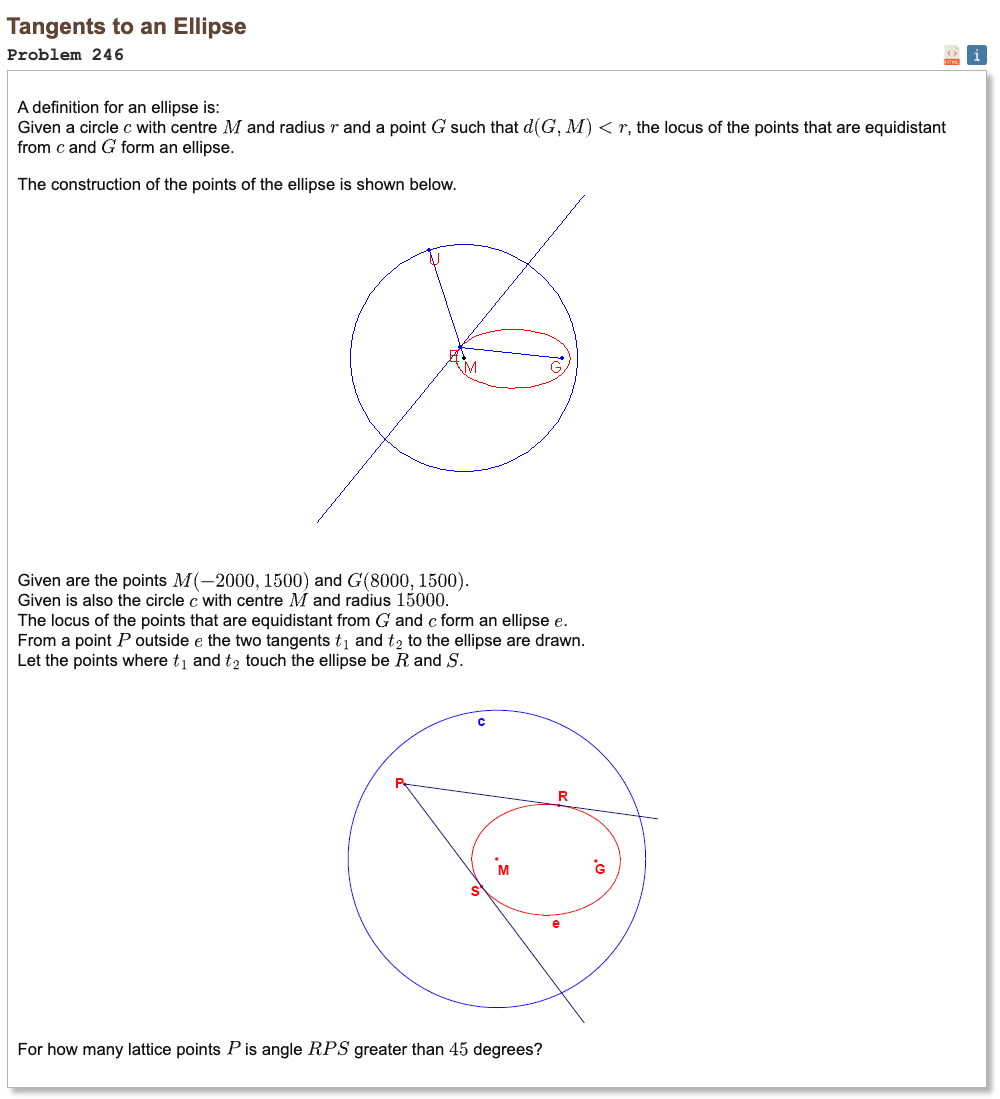

## Initial approach

* shift coordinates so the ellipse is centered at the origin, this keeps lattice points as lattice points
* the foci become at (−5000, 0) and (5000, 0), and the ellipse equation becomes x²/a² + y²/b² = 1 with a = 7500 and b² = 31,250,000
* for an external point P = (u, v), the two tangents form a pair of lines, and you can get their angle from the quadratic form of the “pair of tangents” equation without explicitly finding the tangency points
* after simplifying, the condition angle(RPS) > 45° becomes one strict inequality in X = u² and Y = v², it turns into a quadratic inequality in Y for each fixed X
* for each integer u, solve that quadratic inequality to get an interval (Y_low, Y_high) where the angle condition holds, then count how many integer v have v² inside that interval using square roots
* also enforce that P is outside the ellipse, which is another simple inequality in X and Y
* the valid u range is bounded (about 15k), so looping over u and doing O(1) work per u is fast, and symmetry gives a factor of 2 for ±u and ±v

In [1]:
from math import isqrt

A2 = 56250000
B2 = 31250000
C = A2 + B2
AB = A2 * B2

def ceil_sqrt(n):
    r = isqrt(n)
    if r * r == n:
        return r
    return r + 1

def cond(X, Y):
    if B2 * X + A2 * Y <= AB:
        return False
    return 4 * (B2 * X + A2 * Y - AB) > (X + Y - C) * (X + Y - C)

def count_v_for_u(u):
    X = u * u
    q = 2 * X - 6 * A2 - 2 * B2
    r = (X - C) * (X - C) - 4 * B2 * X + 4 * AB
    D = q * q - 4 * r
    if D <= 0:
        return 0

    s = isqrt(D)
    low = (-q - s) // 2 - 4
    high = (-q + s) // 2 + 4
    if high < 0:
        return 0
    if low < 0:
        low = 0

    vmin = ceil_sqrt(low)
    vmax = isqrt(high)

    while vmin <= vmax and not cond(X, vmin * vmin):
        vmin += 1
    while vmin <= vmax and not cond(X, vmax * vmax):
        vmax -= 1

    if vmin > vmax:
        return 0

    cnt = vmax - vmin + 1
    if vmin == 0:
        return 1 + 2 * (cnt - 1)
    return 2 * cnt

def solve():
    umax = 0
    for u in range(0, 200000):
        if count_v_for_u(u) > 0:
            umax = u
        elif u > umax + 2000 and umax > 0:
            break

    total = 0
    for u in range(0, umax + 1):
        cv = count_v_for_u(u)
        if u == 0:
            total += cv
        else:
            total += 2 * cv
    return total

In [2]:
%%time
result = solve()
print("Result:", result)

Result: 785541824
CPU times: user 46.1 ms, sys: 2.13 ms, total: 48.3 ms
Wall time: 47.1 ms
